In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('attacks_limpieza3.csv',index_col=0)
df.head(2)

,case_number,year,type,country,age,species_,month,fatal,sex,species_shark,age_clean,edad_ataques
0,1800.00.00,1800,Unprovoked,seychelles,NaN,NaN,NaN,Y,F,Unspecified,NaN,NaN
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,May,Y,NaN,Unspecified,NaN,NaN


## Pair Programming Limpieza III

Hipótesis

Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.

- ¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?

- ¿Hay diferencias entre los paises en los ataques a hombres y mujeres?

- ¿Cuáles son las edades que más sufren ataques?

- Independientemente de la edad, sufren los hombres más ataques que las mujeres?

- ¿En qué mes ocurren más ataques?

- ¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?

- ¿Cómo han evolucionado los ataques a lo largo del tiempo?

Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

1. ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [41]:
numericas = df.select_dtypes(include = np.number)
numericas

,year,age,age_clean
0,1800,NaN,NaN
1,1797,NaN,NaN
2,1792,NaN,NaN
3,1791,NaN,NaN
4,1788,NaN,NaN
...,...,...,...
1667,1901,29.0,29.0
1668,1894,19.0,19.0
1669,1892,21.0,21.0
1670,1880,12.0,12.0


2. Identifica visualmente los outliers

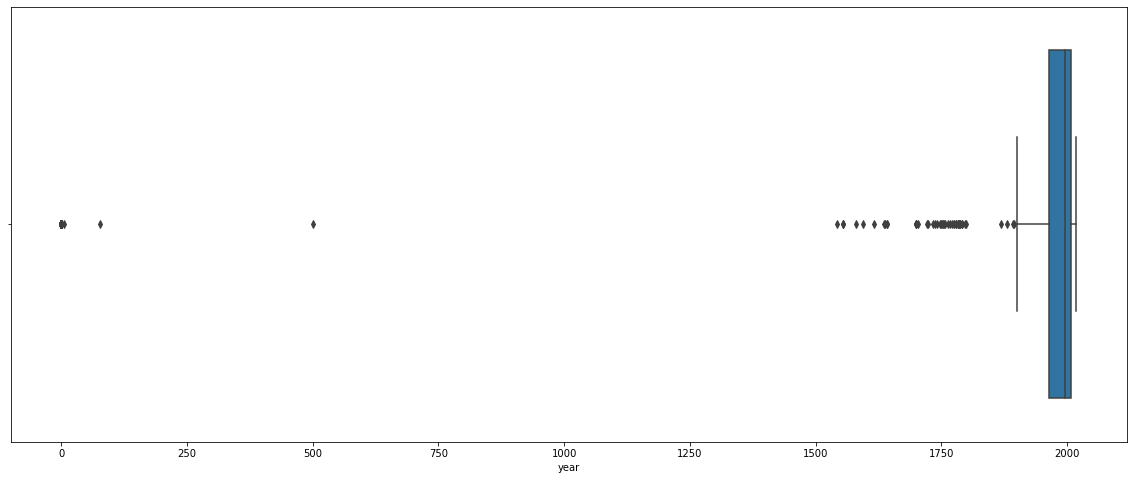

In [42]:
plt.figure (figsize = (20,8))
fig = sns.boxplot(x= 'year',data = df)
plt.show();


3. Identifica sobre el dataframe las filas que son outliers

In [43]:
def detectar_outliers(lista_columnas, df): 
    
    dicc_indices = {}

    for col in lista_columnas:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        outliers_data = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[col] = (list(outliers_data.index)) 
        
    return dicc_indices 

In [45]:
numericas.columns

Index(['year', 'age', 'age_clean'], dtype='object')

In [47]:
numericas_lista= list(numericas)

In [50]:
ind=detectar_outliers(numericas_lista,df)
print(ind)

{'year': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 1668, 1669, 1670, 1671], 'age': [182, 200, 221, 250, 254, 291, 309, 311, 354, 372, 399, 496, 499, 522, 603, 657, 729, 759, 838, 924, 939, 1087, 1099, 1217, 1229, 1603], 'age_clean': [182, 200, 221, 250, 254, 291, 309, 311, 354, 372, 399, 496, 499, 52

4. Reemplaza los outliers por el estadístico más correcto.

5. Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.